In [1]:
import pandas as pd

#train_x = pd.read_csv('/mnt/hdd18.2t/sea120424/exchange/ML/datasets/project/train_binary_x.csv')
#train_y = pd.read_csv('/mnt/hdd18.2t/sea120424/exchange/ML/datasets/project/train_binary_y.csv')
#test_x = pd.read_csv('/mnt/hdd18.2t/sea120424/exchange/ML/datasets/project/test_binary_x.csv')
#test_y = pd.read_csv('/mnt/hdd18.2t/sea120424/exchange/ML/datasets/project/test_binary_y.csv')
train_x = pd.read_csv('../ML_storage/train_binary_x.csv')
train_y = pd.read_csv('../ML_storage/train_binary_y.csv')
test_x = pd.read_csv('../ML_storage/test_binary_x.csv')
test_y = pd.read_csv('../ML_storage/test_binary_y.csv')

In [2]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVR
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np



In [3]:
#from imblearn.over_sampling import SMOTE
#smt = SMOTE(random_state = 100, sampling_strategy = 1.0)
#train_x_smt, train_y_smt = smt.fit_resample(train_x, train_y)
#print(train_y_smt.value_counts())

In [3]:
x = train_x.to_numpy()
y = train_y.to_numpy().ravel()
testX = test_x.to_numpy()
testY = test_y.to_numpy().ravel()

In [5]:
# svm_clf = SVC(kernel="linear", C=1.0, cache_size=5000)
# svm_clf.fit(x, y)
# life-time to run, the threshold is 10,000 data

In [6]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(x, y)

/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=5)

In [7]:
result = clf.predict(testX)

In [8]:
from sklearn.metrics import mean_squared_error

mean_squared_error(result, testY)

0.10485499118730973

In [11]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

Linear_clf = LinearSVC(C=1, random_state=42)
clf = CalibratedClassifierCV(Linear_clf) 
clf.fit(x, y)

/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


CalibratedClassifierCV(base_estimator=LinearSVC(C=1, random_state=42))

In [12]:
result = clf.predict(testX)
mean_squared_error(result, testY)

0.03778240666559846

In [14]:
train_result = clf.predict(x)
print(train_result)
acc_num = 0
for idx, i in enumerate(train_result):
    if train_result[idx] == y[idx]:
        acc_num += 1
print("train acc:", acc_num / len(train_result))

result = clf.predict(testX)
acc_num = 0
for idx, i in enumerate(result):
    if result[idx] == testY[idx]:
        acc_num += 1
print(acc_num / len(result))


fp = open("result-SVC_Cas1-0.962193.txt", 'w')
result = clf.predict_proba(testX)
for index, pred in enumerate(result):
    fp.write(f"{index}, {pred[1]}\n")


[0 1 0 ... 0 0 0]
train acc: 0.9621935587245634
0.9622175933344015


/tmp/ipykernel_28288/940411913.py:9: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


<AxesSubplot:xlabel='0', ylabel='y'>

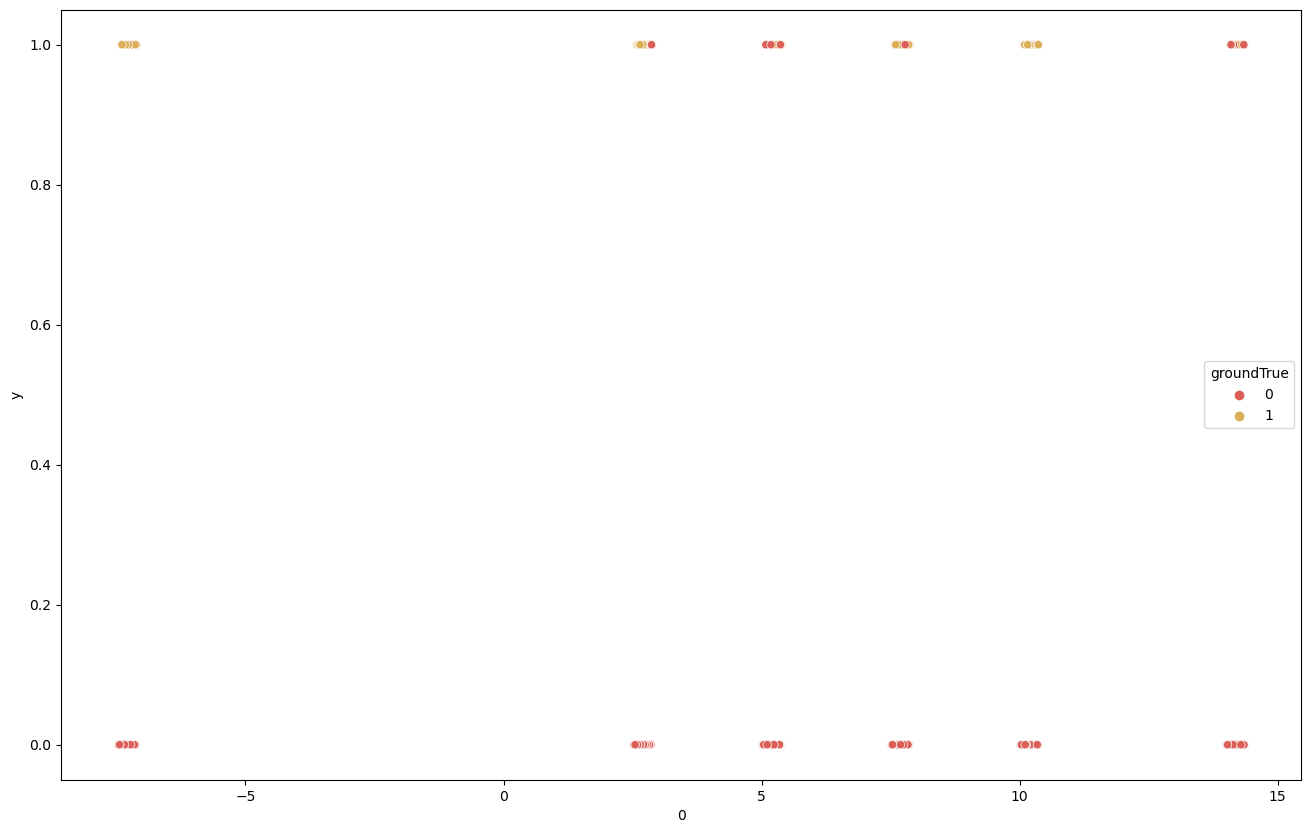

In [11]:
pca = PCA(n_components=1)
pca_result = pca.fit_transform(testX)

df = pd.DataFrame(pca_result)
df['y'] = result
df['groundTrue'] = testY 

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=0, y='y',
    hue="groundTrue",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=1
)

In [12]:
print(classification_report(testY, result))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     27490
           1       0.76      1.00      0.86      3715

    accuracy                           0.96     31205
   macro avg       0.88      0.98      0.92     31205
weighted avg       0.97      0.96      0.96     31205



In [13]:
Linear_clf = LinearSVC(C=1, random_state=42)
Linear_clf.fit(x, y)
result = Linear_clf.predict(testX)
mean_squared_error(result, testY)

/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.03787854510495113

/tmp/ipykernel_28288/940411913.py:9: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


<AxesSubplot:xlabel='0', ylabel='y'>

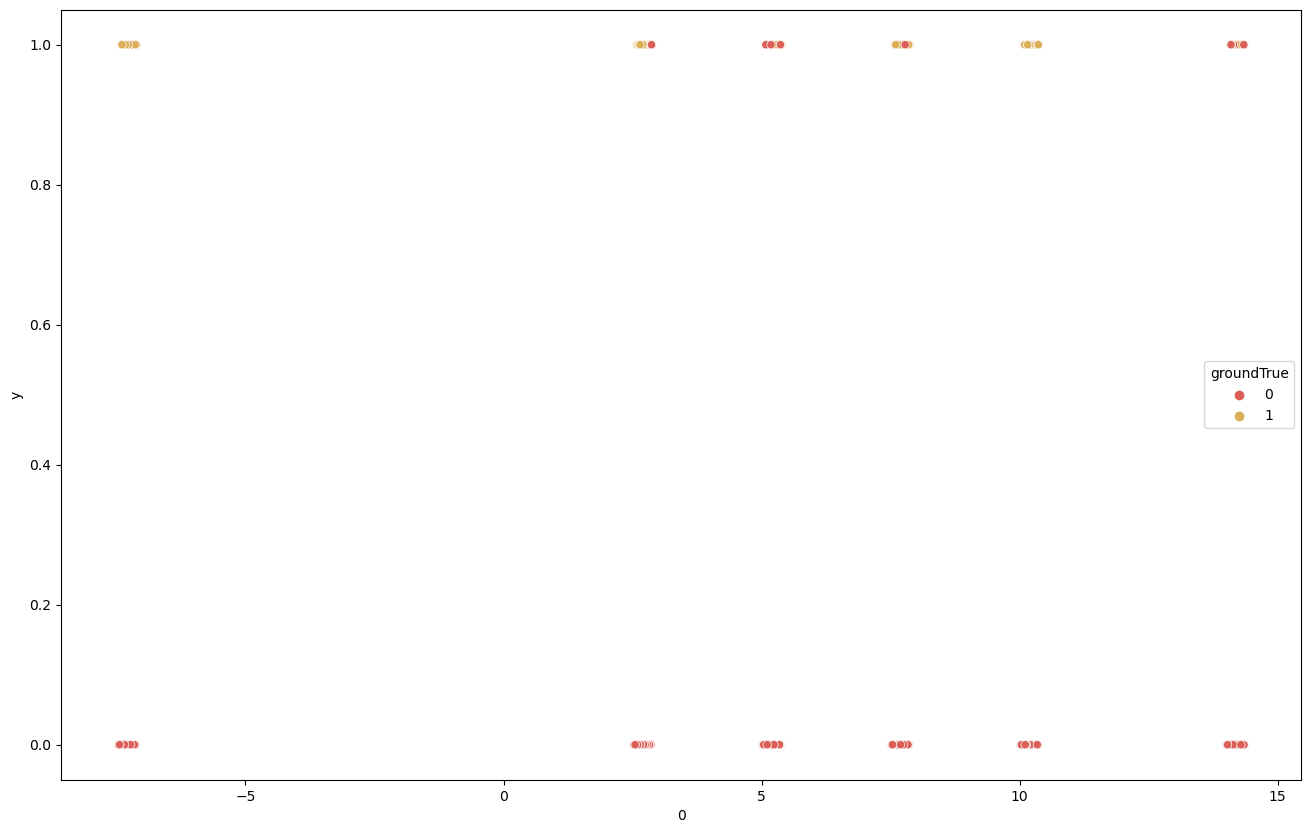

In [14]:
pca = PCA(n_components=1)
pca_result = pca.fit_transform(testX)

df = pd.DataFrame(pca_result)
df['y'] = result
df['groundTrue'] = testY 

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=0, y='y',
    hue="groundTrue",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=1
)

In [15]:
print(classification_report(testY, result))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     27490
           1       0.76      1.00      0.86      3715

    accuracy                           0.96     31205
   macro avg       0.88      0.98      0.92     31205
weighted avg       0.97      0.96      0.96     31205



In [16]:
Linear_clf = LinearSVC(C=10, random_state=42)
Linear_clf.fit(x, y)
result = Linear_clf.predict(testX)
mean_squared_error(result, testY)

/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.03787854510495113

/tmp/ipykernel_28288/940411913.py:9: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


<AxesSubplot:xlabel='0', ylabel='y'>

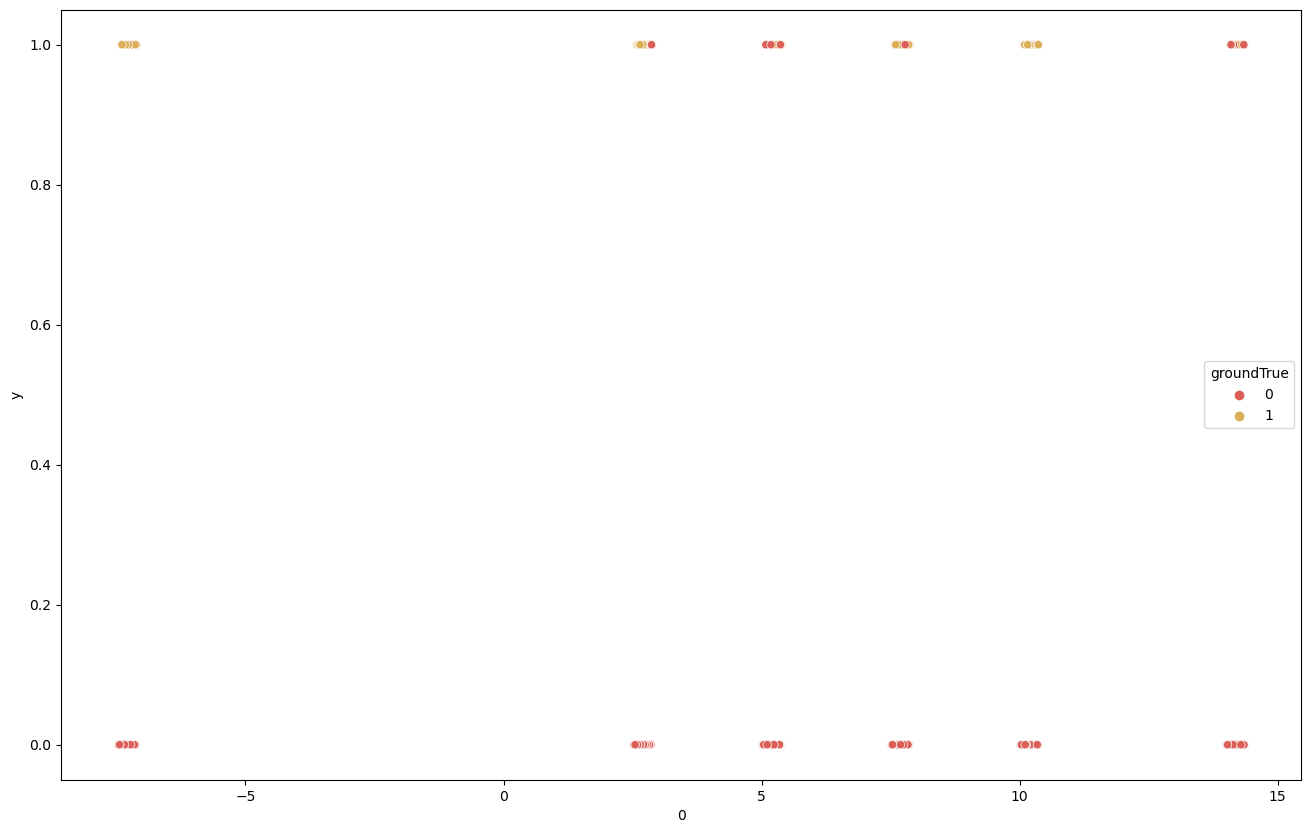

In [17]:
pca = PCA(n_components=1)
pca_result = pca.fit_transform(testX)

df = pd.DataFrame(pca_result)
df['y'] = result
df['groundTrue'] = testY 

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=0, y='y',
    hue="groundTrue",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=1
)

In [18]:
print(classification_report(testY, result))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     27490
           1       0.76      1.00      0.86      3715

    accuracy                           0.96     31205
   macro avg       0.88      0.98      0.92     31205
weighted avg       0.97      0.96      0.96     31205



In [19]:
Linear_clf = LinearSVC(C=50, random_state=42)
Linear_clf.fit(x, y)
result = Linear_clf.predict(testX)
mean_squared_error(result, testY)

/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.0379746835443038

/tmp/ipykernel_28288/940411913.py:9: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


<AxesSubplot:xlabel='0', ylabel='y'>

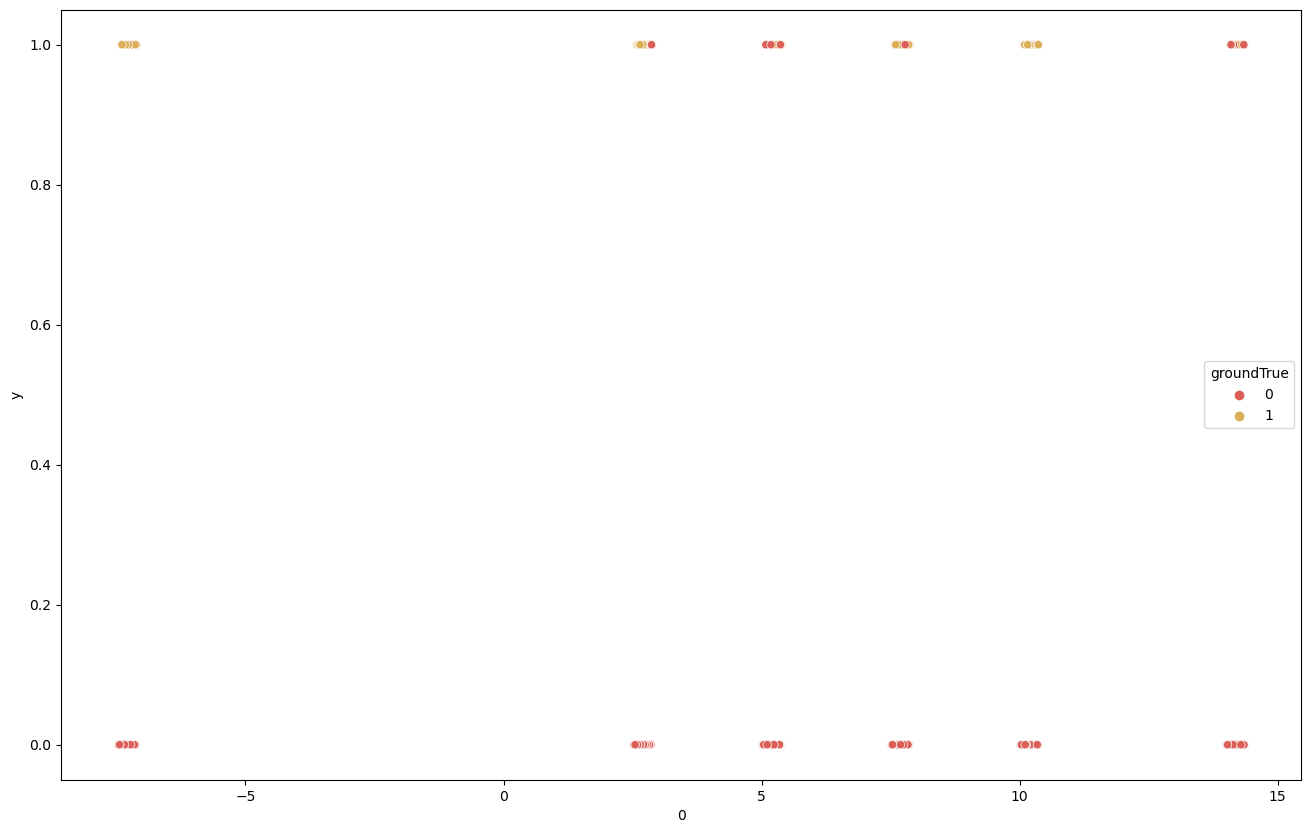

In [20]:
pca = PCA(n_components=1)
pca_result = pca.fit_transform(testX)

df = pd.DataFrame(pca_result)
df['y'] = result
df['groundTrue'] = testY 

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=0, y='y',
    hue="groundTrue",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=1
)

In [21]:
print(classification_report(testY, result))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     27490
           1       0.76      1.00      0.86      3715

    accuracy                           0.96     31205
   macro avg       0.88      0.98      0.92     31205
weighted avg       0.97      0.96      0.96     31205



In [15]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5, C = 10, random_state=42)
svm_reg.fit(x, y)
result = svm_reg.predict(testX)

mean_squared_error(result, testY)

[0. 0. 0. ... 0. 0. 0.]


0.12091011055920525

In [23]:
pca = PCA(n_components=1)
pca_result = pca.fit_transform(testX)

df = pd.DataFrame(pca_result)
df['y'] = result
df['groundTrue'] = testY 


/tmp/ipykernel_28288/774928199.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


<AxesSubplot:xlabel='0', ylabel='y'>

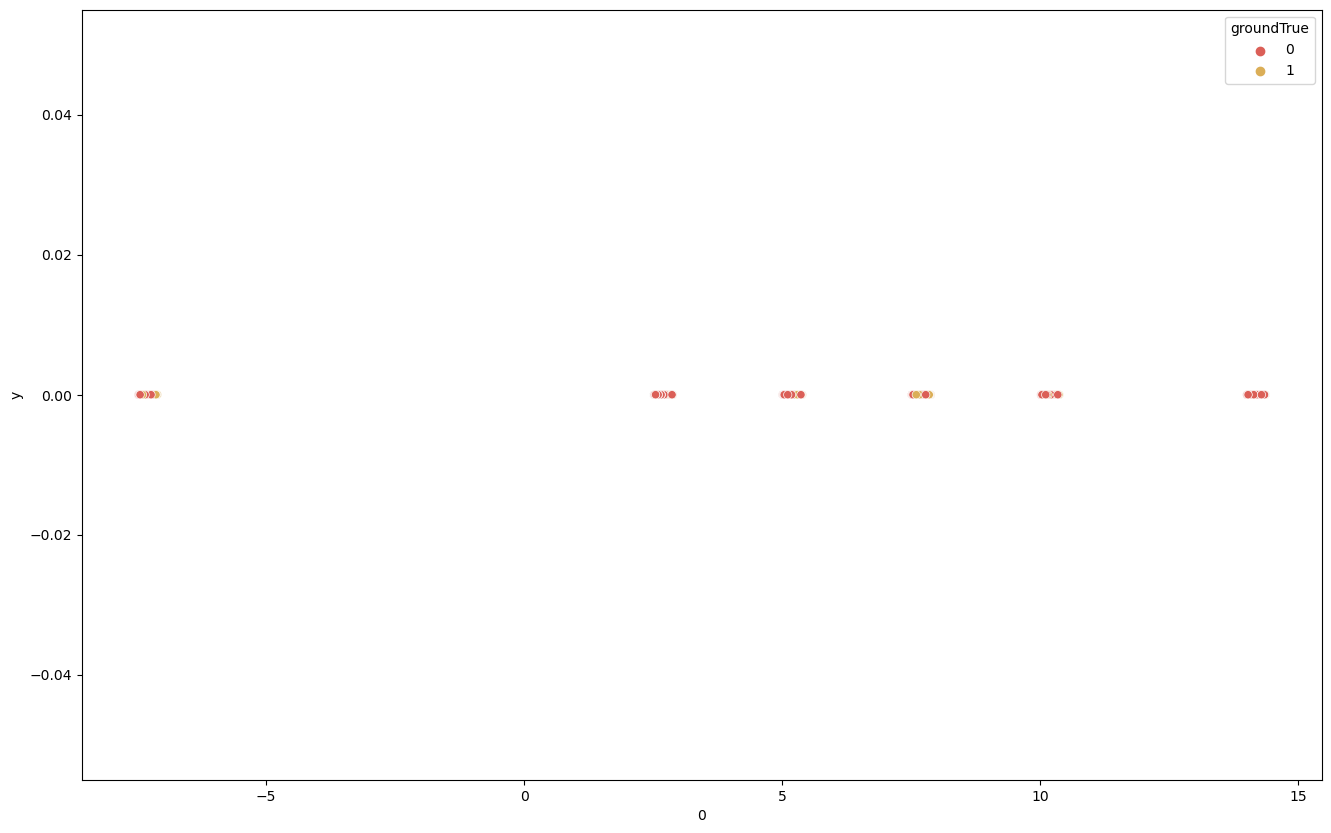

In [24]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=0, y='y',
    hue="groundTrue",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=1
)

In [25]:
svm_reg = LinearSVR(epsilon=1, C = 10, random_state=42)
svm_reg.fit(x, y)
result = svm_reg.predict(testX)
mean_squared_error(result, testY)

0.11905143406505368

/tmp/ipykernel_28288/940411913.py:9: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


<AxesSubplot:xlabel='0', ylabel='y'>

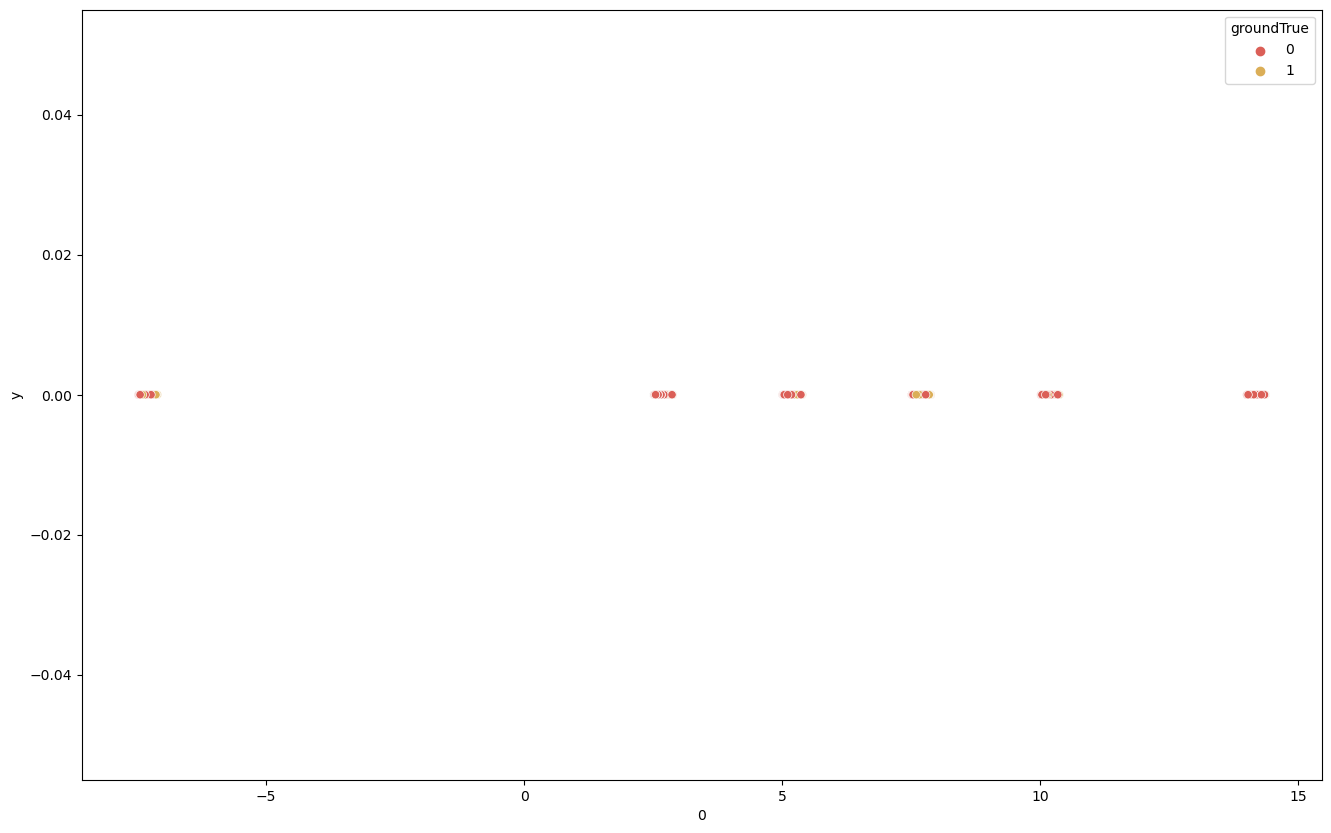

In [26]:
pca = PCA(n_components=1)
pca_result = pca.fit_transform(testX)

df = pd.DataFrame(pca_result)
df['y'] = result
df['groundTrue'] = testY 

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=0, y='y',
    hue="groundTrue",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=1
)

In [19]:
svm_reg = LinearSVR(epsilon=0, C = 1, random_state=42)
svm_reg.fit(x, y)
result = svm_reg.predict(testX)

# mean_squared_error(result, testY)

train_result = svm_reg.predict(x)
train_result = np.round(train_result)

acc_num = 0
for idx, i in enumerate(train_result):
    if train_result[idx] == y[idx]:
        acc_num += 1
print('train_acc', acc_num / len(train_result))

fp = open("result-SVR-0.959717.txt", 'w')
result = clf.predict_proba(testX)
for index, pred in enumerate(result):
    print(f"{index}, {pred[1]}")
    fp.write(f"{index}, {pred[1]}\n")


/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


train_acc 0.9597179939112321
0, 0.0024301779846122216
1, 0.0038690677265925356
2, 0.0032819902021735325
3, 0.754522165527981
4, 0.0035017709815317265
5, 0.0033686649743224066
6, 0.0029427888630234665
7, 0.0032294943730423525
8, 0.0036668061856881006
9, 0.003822990672478649
10, 0.003090450612372954
11, 0.004007305820403897
12, 0.0038561474105133276
13, 0.005375252226315318
14, 0.0024244242571404345
15, 0.0024260265057205284
16, 0.6314372578480539
17, 0.9993309930788339
18, 0.0032623804119185093
19, 0.002919060674650888
20, 0.00410835362658495
21, 0.0018437862061771286
22, 0.002341955498938815
23, 0.0030008994124254124
24, 0.0034504457939953112
25, 0.0033686649743224066
26, 0.002889037390706231
27, 0.002515527487019468
28, 0.0027902594971023586
29, 0.008913659653746436
30, 0.6630147906042064
31, 0.6623793715528505
32, 0.002515527487019468
33, 0.002687207705249867
34, 0.004018945060766126
35, 0.0024260265057205284
36, 0.0024710475751265185
37, 0.0019165300786298065
38, 0.00311600138378489

/tmp/ipykernel_28288/940411913.py:9: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


<AxesSubplot:xlabel='0', ylabel='y'>

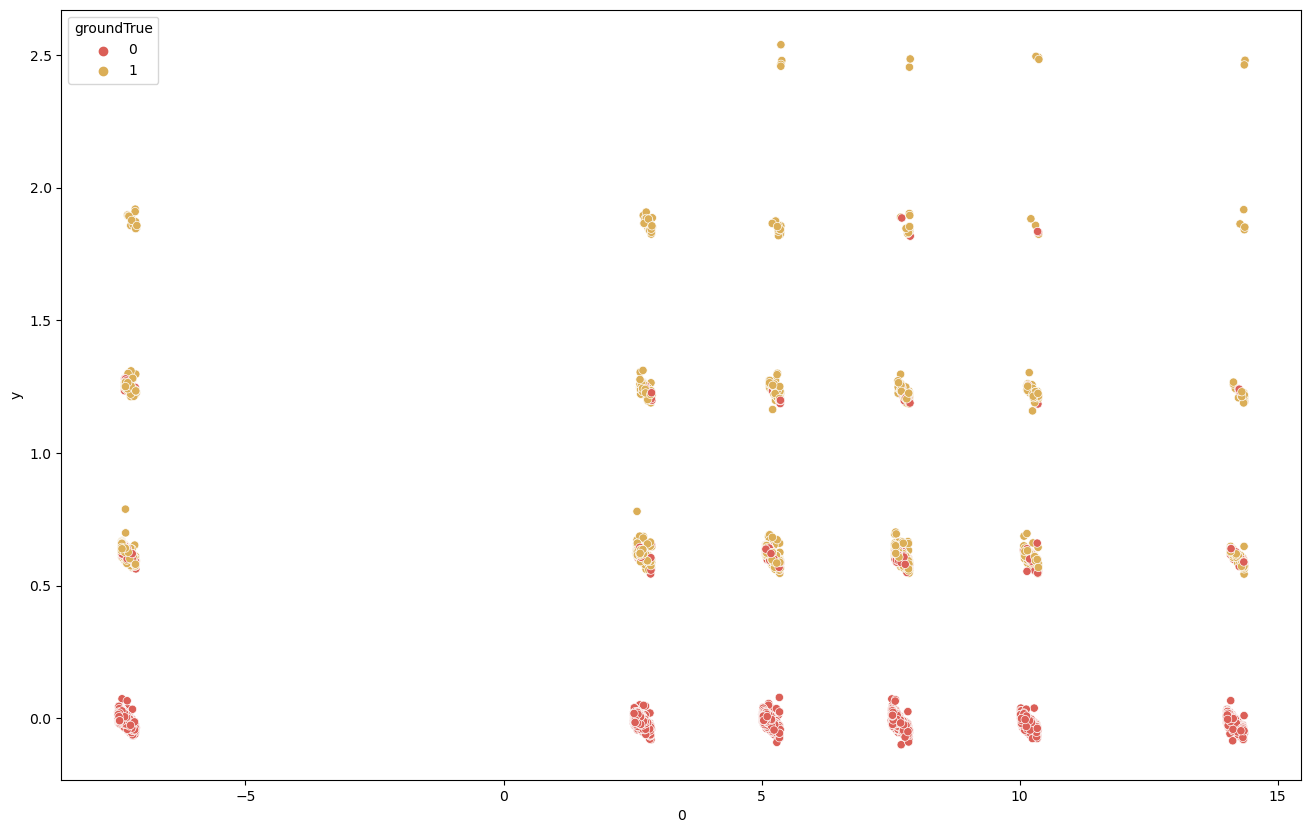

In [28]:
pca = PCA(n_components=1)
pca_result = pca.fit_transform(testX)

df = pd.DataFrame(pca_result)
df['y'] = result
df['groundTrue'] = testY 

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=0, y='y',
    hue="groundTrue",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=1
)

In [29]:
hard_result = np.round(result)

print(classification_report(testY, hard_result))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     27490
         1.0       0.75      0.98      0.85      3715
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0

    accuracy                           0.96     31205
   macro avg       0.44      0.48      0.46     31205
weighted avg       0.97      0.96      0.96     31205



/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm_reg = LinearSVR(epsilon=0, C = 5, random_state=42)
svm_reg.fit(x, y)
result = svm_reg.predict(testX)
mean_squared_error(result, testY)

In [ ]:
pca = PCA(n_components=1)
pca_result = pca.fit_transform(testX)

df = pd.DataFrame(pca_result)
df['y'] = result
df['groundTrue'] = testY 

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=0, y='y',
    hue="groundTrue",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=1
)

In [ ]:
svm_reg = LinearSVR(epsilon=0, C = 10, random_state=42)
svm_reg.fit(x, y)
result = svm_reg.predict(testX)
mean_squared_error(result, testY)

In [ ]:
pca = PCA(n_components=1)
pca_result = pca.fit_transform(testX)

df = pd.DataFrame(pca_result)
df['y'] = result
df['groundTrue'] = testY 

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=0, y='y',
    hue="groundTrue",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=1
)

In [ ]:
hard_result = np.round(result)

print(classification_report(testY, hard_result))

In [ ]:
svm_reg = LinearSVR(epsilon=0, C = 50, random_state=42)
svm_reg.fit(x, y)
result = svm_reg.predict(testX)
mean_squared_error(result, testY)

In [ ]:
hard_result = np.round(result)

print(classification_report(testY, hard_result))


In [ ]:
pca = PCA(n_components=1)
pca_result = pca.fit_transform(testX)

df = pd.DataFrame(pca_result)
df['y'] = result
df['groundTrue'] = testY 


In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=0, y='y',
    hue="groundTrue",
    palette=sns.color_palette("husl", 4),
    data=df,
    legend="full",
    alpha=1
)

In [ ]:
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

In [ ]:
pca = PCA(n_components=1)
pca_train_result = pca.fit_transform(x)

svm_reg = LinearSVR(epsilon=0, C = 10, random_state=42)
svm_reg.fit(pca_train_result, y)

pca_test_result = pca.transform(testX)
result = svm_reg.predict(pca_test_result)
print(mean_squared_error(result, testY))

svm_reg.support_ = find_support_vectors(svm_reg, pca_test_result, testY)

In [ ]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)



In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg, pca_test_result, testY, [])